In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('dataset/Animal_Shelter_Intake_and_Outcome.csv', sep=';')

Name - Name of the animal. Animal names with an asterisk before them were given by shelter staff.<br>
Type - Type of animal<br>
Breed - Breed of animal<br>
Color - Color of animal, Black, Chocolate, White….
<br>Sex - Male, Female, Neutered Male, Spayed Female
<br>Size - Large, medium, small, toy
<br>Date Of Birth - Approximate date of birth.
<br>Impound Number - Animal impound number
<br>Kennel Number - Kennel number indicating its current location.
<br>Animal ID - Unique ID
<br>Intake Date	- Date animal was taken into the shelter
<br>Outcome Date - Date animal left the shelter
<br>Days in Shelter	- Number of days the animal was in the shelter
<br>Intake Type	- Reason for intake
<br>Intake Subtype - Sub reason for intake
<br>Outcome Type - Reason for release from shelter
<br>Outcome Subtype	- Sub reason for release from shelter
<br>Intake Condition - Animals condition at intake
<br>Outcome Condition - Animals condition at release from shelter
<br>Intake Jurisdiction	- Jurisdiction responsible for animal intake
<br>Outcome Jurisdiction - Area animal went to.
<br>Outcome Zip Code - Zip code where animal went to.
<br>Location - Latitude, Longitude coordinates for outcome jurisdiction
<br>Count - Column for performing arithmetic and creating groups for views and visualizations

In [3]:
df.isnull().sum()

Name                    6670
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      35
Date Of Birth           6329
Impound Number             0
Kennel Number             30
Animal ID                  0
Intake Date                0
Outcome Date             211
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             217
Outcome Subtype          537
Intake Condition           0
Outcome Condition        564
Intake Jurisdiction        0
Outcome Jurisdiction    3668
Outcome Zip Code        3724
Location                3724
Count                      0
dtype: int64

In [4]:
df = df.drop(['Impound Number', 'Animal ID'], axis=1)
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,12/26/2022,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,05/18/2023,05/21/2023,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,05/21/2023,...,FIELD,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,10/23/2019,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,10/02/2014,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,08/20/2020,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


In [5]:
unique_names = df['Name'].unique().tolist()
unique_names

['RAZOR',
 nan,
 'CHLOE',
 'MAX',
 'OSO',
 'FELLA',
 'PUDGY',
 'LEXI',
 'KENJI',
 'SONOMA',
 'COCO',
 '*TABITHA',
 'NAKITA',
 '*PEPPER',
 'SATIN',
 'PENNY',
 'SIR DUNCAN NEPAL',
 '*RYAN',
 'POPPY',
 '*MICHAELA',
 '*SQUID',
 'JAY',
 'DRAGON',
 'HOUDINI',
 'MILLIE',
 'NALA',
 'MACK',
 'SNOWY',
 '*TED',
 'BENTLEY',
 'CLOE',
 'VINNIE',
 '*SPROUT',
 'BENJIE',
 'SMOKEY',
 'BEA',
 'POE',
 'NOVA',
 'CHICO',
 'ZEUS',
 '*JENNY',
 'TURKEY VULTURE',
 'HORATIO',
 'CENNORS',
 'MANDY',
 'SASHA',
 'MOCHI',
 '*CHECKERS',
 'NICKI',
 '*CODY',
 '*LUZ',
 'MITCH',
 '*GINNY',
 'WIZARD',
 '*CASHEW',
 'BRUNO',
 'CASH',
 'CHIQUIO',
 '*GRACE',
 'TANK',
 '*TWINKLES',
 'HAMMY',
 'LOBO',
 '*PHOENIX',
 '*TUCKER',
 'PIGGY PIGGY',
 '*GEORGE',
 '*MULAN',
 'KITTY KITTY',
 'ALEX',
 'BRUTIE',
 '*SPARKLE',
 '*SHINE',
 '*LILLY',
 'LITA',
 '*FREDDY',
 'NINA BEAR',
 'TOMMY',
 'SELVA',
 'LITTLE BUDDY',
 'NINA',
 'OREO',
 'ROCKY',
 'OSSO',
 '*LUCKY',
 '*BUTTERCUP',
 'KITTY BOY',
 'INO',
 'LISTO',
 '*MILA',
 'PANDA',
 '*NALA',
 

In [6]:
df['Name'] = df['Name'].str.replace('*', '')
df['Name']

0          RAZOR
1            NaN
2            NaN
3            NaN
4          CHLOE
          ...   
25430       BUBA
25431    JESSICA
25432     SHINER
25433     NEWTON
25434        NaN
Name: Name, Length: 25435, dtype: object

In [7]:
df.dtypes

Name                     object
Type                     object
Breed                    object
Color                    object
Sex                      object
Size                     object
Date Of Birth            object
Kennel Number            object
Intake Date              object
Outcome Date             object
Days in Shelter          object
Intake Type              object
Intake Subtype           object
Outcome Type             object
Outcome Subtype          object
Intake Condition         object
Outcome Condition        object
Intake Jurisdiction      object
Outcome Jurisdiction     object
Outcome Zip Code        float64
Location                 object
Count                     int64
dtype: object

In [8]:
df = df.drop('Location', axis=1)

In [9]:
unique_types = df['Type'].unique().tolist()
unique_types

['DOG', 'OTHER', 'CAT']

In [10]:
otherAnimals = df[df["Type"] == "OTHER"]
otherAnimals

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count
5,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,STRAY,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,1
12,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,EUTH,03/13/2023,03/13/2023,...,QUARANTINE,FIELD,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,1
14,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,CONFISCATE,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1
17,NaN,OTHER,BAT/MEX FREE-TAIL,GRAY,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,QUARANTINE,FIELD,EUTHANIZE,FRA,UNKNOWN,HEALTHY,COUNTY,NaN,NaN,1
20,SATIN,OTHER,HORSE,BLACK/WHITE,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,CONFISCATE,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,NaN,OTHER,RABBIT SH,BLACK/WHITE,Unknown,SMALL,06/23/2016,CA01,06/23/2016,06/23/2016,...,STRAY,BORN_HERE,EUTHANIZE,UNDERAGEWT,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,1
25400,NaN,OTHER,CHICKEN,BROWN,Female,SMALL,NaN,LS01,02/01/2019,02/14/2019,...,STRAY,FIELD,ADOPTION,FB OTHER,UNKNOWN,PENDING,COUNTY,OUT OF COUNTY,95482.0,1
25423,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,TRUCK,08/18/2020,08/18/2020,...,QUARANTINE,FIELD,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,STRAY,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,1


In [11]:
uniqueBreedsOfDifferentAnimals = otherAnimals['Breed'].value_counts().to_dict()
uniqueBreedsOfDifferentAnimals

{'CHICKEN': 419,
 'RABBIT SH': 364,
 'BAT': 244,
 'GUINEA PIG': 114,
 'GOAT': 95,
 'SHEEP': 64,
 'HORSE': 49,
 'RAT': 49,
 'PIG': 47,
 'PARAKEET': 44,
 'PIGEON': 34,
 'KOI': 25,
 'PEAFOWL': 24,
 'COCKATIEL': 23,
 'LOP-MINI': 22,
 'HAMSTER': 21,
 'DUCK': 20,
 'REX': 18,
 'GOOSE': 18,
 'RACCOON': 17,
 'ENGLISH SPOT/MIX': 14,
 'RABBIT LH': 14,
 'AMERICAN': 14,
 'LOP-ENGLISH': 13,
 'HOTOT': 11,
 'LOP-HOLLAND': 11,
 'CANARY': 10,
 'OPOSSUM': 9,
 'DUTCH/MIX': 9,
 'CALIFORNIAN': 8,
 'CALIFORNIAN/MIX': 8,
 'LOP-AMER FUZZY': 8,
 'ENGLISH SPOT': 8,
 'MOUSE': 8,
 'FINCH': 8,
 'GOAT/BOER': 7,
 'PARROT': 7,
 'NEW ZEALAND WHT': 7,
 'GOAT/LA MANCHA': 7,
 'POTBELLY PIG': 7,
 'DOVE': 7,
 'HAVANA/MIX': 7,
 'BAT/MEX FREE-TAIL': 7,
 'SKUNK': 7,
 'TURTLE': 7,
 'DUTCH': 6,
 'REX/MIX': 6,
 'BOER': 5,
 'TROPICAL': 5,
 'NETHERLND DWARF': 5,
 'HAVANA': 5,
 'LOP-MINI/MIX': 5,
 'FOX': 4,
 'TURKEY': 4,
 'TORTOISE': 4,
 'FLEMISH GIANT': 4,
 'ANGUS': 4,
 'LOP-ENGLISH/MIX': 4,
 'MACAW': 4,
 'GOAT/PYGMY': 4,
 'LOP-FRE

Zbiór zwiera różne zwierzęta

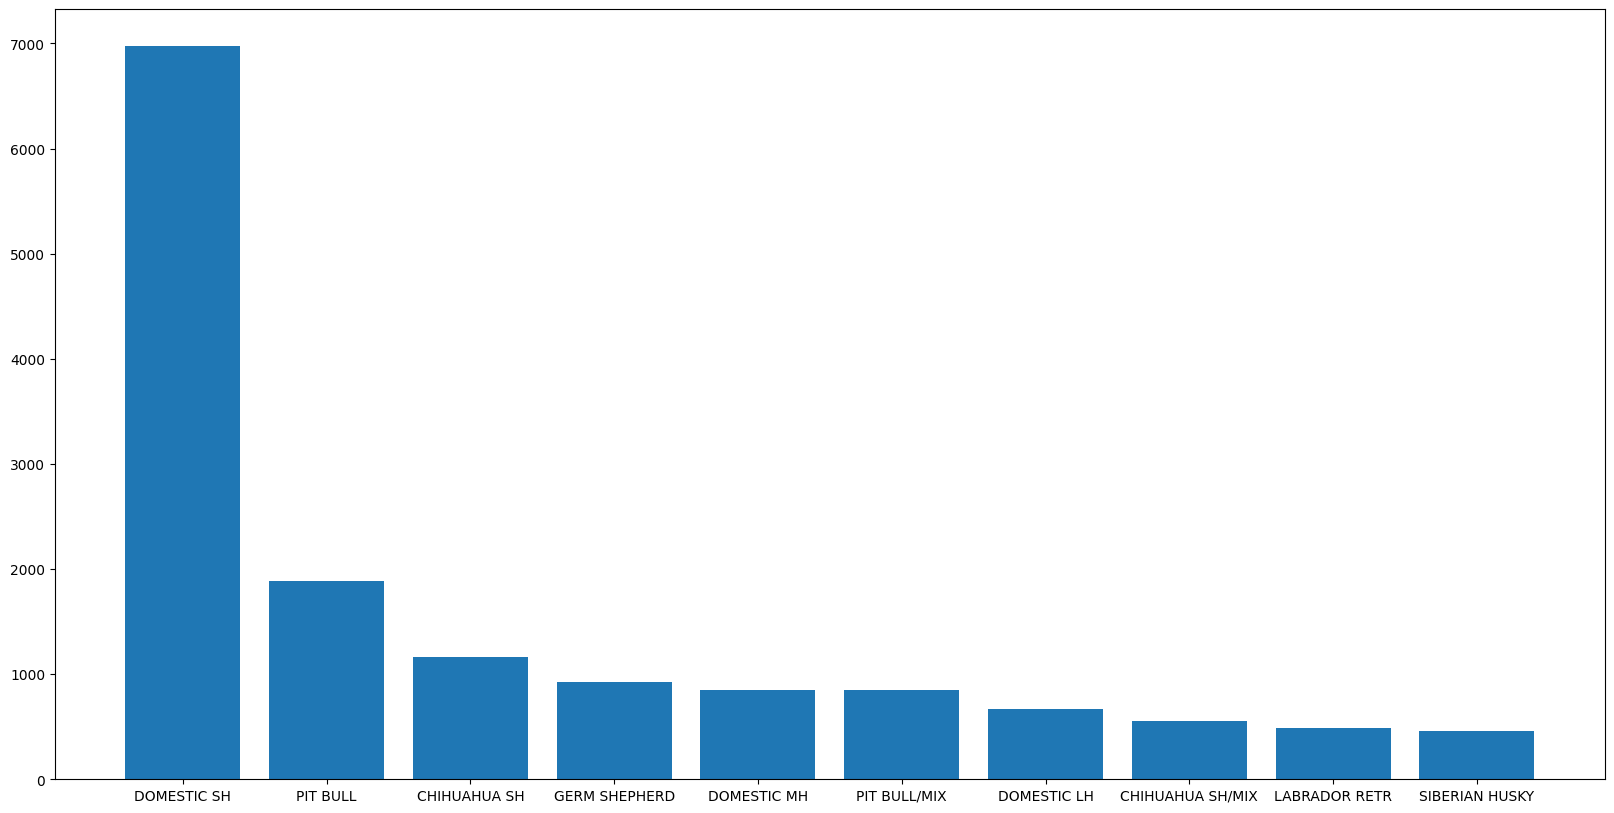

In [12]:
topTenBreeds = df["Breed"].value_counts().head(10)
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

In [13]:
df = df.drop('Outcome Zip Code', axis=1)
df = df.drop('Intake Date', axis=1)
df = df.drop('Outcome Date', axis=1)
df = df.drop('Outcome Type', axis=1)
df = df.drop('Outcome Subtype', axis=1)
df = df.drop('Intake Jurisdiction', axis=1)
df = df.drop('Name', axis=1)

In [14]:
df = df.drop('Outcome Condition', axis=1)
df = df.drop('Outcome Jurisdiction', axis=1)
df = df.drop('Count', axis=1)

In [15]:
df.drop(df[df["Days in Shelter"] == "0"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,3,STRAY,OVER THE COUNTER,UNKNOWN
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,3,STRAY,OVER THE COUNTER,UNKNOWN
3,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,3,STRAY,OVER THE COUNTER,UNKNOWN
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,3,STRAY,FIELD,UNKNOWN
7,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,06/26/2011,VET,4,STRAY,FIELD,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,21,STRAY,OVER THE COUNTER,UNTREATABLE
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,49,STRAY,FIELD,HEALTHY


In [16]:
df["Sex"].unique()

array(['Neutered', 'Female', 'Spayed', 'Male', 'Unknown'], dtype=object)

In [17]:
df = df.replace("Neutered", "Male")
df = df.replace("Spayed", "Female")

In [18]:
df["Size"].unique()

array(['MED', 'SMALL', 'KITTN', 'LARGE', 'X-LRG', 'PUPPY', 'TOY', nan],
      dtype=object)

In [19]:
df = df.replace("KITTN", "SMALL")
df = df.replace("PUPPY", "SMALL")
df = df.replace("TOY", "SMALL")
df = df.replace("MED", "MEDIUM")
df = df.replace("X-LRG", "LARGE")
df['Size'] = df['Size'].fillna("MEDIUM")

In [20]:
df["Size"].unique()

array(['MEDIUM', 'SMALL', 'LARGE'], dtype=object)

In [21]:
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Male,MEDIUM,NaN,DS53,3,STRAY,OVER THE COUNTER,UNKNOWN
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MEDIUM,NaN,DS49,3,STRAY,OVER THE COUNTER,UNKNOWN
3,DOG,GERM SHEPHERD,BLACK/BROWN,Male,MEDIUM,NaN,DS60,3,STRAY,OVER THE COUNTER,UNKNOWN
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,3,STRAY,FIELD,UNKNOWN
7,CAT,DOMESTIC LH,GRAY/WHITE,Female,SMALL,06/26/2011,VET,4,STRAY,FIELD,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Male,SMALL,10/15/2017,CA02,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Female,SMALL,11/08/2017,CA01,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,DS70,21,STRAY,OVER THE COUNTER,UNTREATABLE
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Male,SMALL,07/28/2011,DS91,49,STRAY,FIELD,HEALTHY


In [22]:
df.drop(df[df["Intake Condition"] == "UNKNOWN"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,07/06/2018,LOBBY,4,STRAY,OVER THE COUNTER,HEALTHY
16,CAT,DOMESTIC SH,BLACK,Female,SMALL,07/14/2022,LOBBY,63,STRAY,OVER THE COUNTER,HEALTHY
19,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,08/29/2022,CA02,59,STRAY,OVER THE COUNTER,HEALTHY
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,01/12/2022,CA02,45,STRAY,OVER THE COUNTER,HEALTHY
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,04/10/2022,CA02,33,OWNER SURRENDER,OVER THE COUNTER,HEALTHY
...,...,...,...,...,...,...,...,...,...,...,...
25429,DOG,AUST CATTLE DOG,TAN/BLACK,Unknown,SMALL,02/21/2022,CS04,2,STRAY,BORN_HERE,TREATABLE/REHAB
25430,CAT,DOMESTIC SH,GRAY/WHITE,Male,SMALL,10/15/2017,CA02,20,STRAY,OVER THE COUNTER,HEALTHY
25431,OTHER,AMERICAN,WHITE/BROWN,Female,SMALL,11/08/2017,CA01,112,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,DS70,21,STRAY,OVER THE COUNTER,UNTREATABLE


In [23]:
sorted(df["Color"].unique())

['AGOUTI',
 'APRICOT',
 'APRICOT/WHITE',
 'BL BRINDLE',
 'BL BRINDLE/GRAY',
 'BL BRINDLE/TAN',
 'BL BRINDLE/WHITE',
 'BLACK',
 'BLACK/BL BRINDLE',
 'BLACK/BLACK',
 'BLACK/BLK SMOKE',
 'BLACK/BLK TABBY',
 'BLACK/BLUE MERLE',
 'BLACK/BLUE TICK',
 'BLACK/BR BRINDLE',
 'BLACK/BRN MERLE',
 'BLACK/BROWN',
 'BLACK/CHOCOLATE',
 'BLACK/CREAM',
 'BLACK/GOLD',
 'BLACK/GRAY',
 'BLACK/RED',
 'BLACK/SILVER',
 'BLACK/TAN',
 'BLACK/TRICOLOR',
 'BLACK/WHITE',
 'BLACK/YELLOW',
 'BLK SMOKE',
 'BLK SMOKE/WHITE',
 'BLK TABBY',
 'BLK TABBY/GRAY',
 'BLK TABBY/TORTIE',
 'BLK TABBY/WHITE',
 'BLK TIGER/TAN',
 'BLONDE',
 'BLUE',
 'BLUE CREAM',
 'BLUE CREAM/BRN TABBY',
 'BLUE CREAM/CALICO',
 'BLUE CREAM/TORTIE',
 'BLUE CREAM/WHITE',
 'BLUE MERLE',
 'BLUE MERLE/BLACK',
 'BLUE MERLE/GRAY',
 'BLUE MERLE/TAN',
 'BLUE MERLE/WHITE',
 'BLUE PT',
 'BLUE PT/WHITE',
 'BLUE TABBY',
 'BLUE TICK',
 'BLUE TICK/BLACK',
 'BLUE TIGER',
 'BLUE/BL BRINDLE',
 'BLUE/BLACK',
 'BLUE/BLUE',
 'BLUE/BR BRINDLE',
 'BLUE/BROWN',
 'BLUE/FAWN

In [24]:
len(df["Color"].unique())

295

In [25]:
def check_and_replace_color(colors):
    unique_colors = {}
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2:
            reversed_color = "/".join(reversed(parts))
            if reversed_color in unique_colors:
                unique_colors[color] = unique_colors[reversed_color]
            else:
                unique_colors[color] = color
        else:
            unique_colors[color] = color
    
    updated_colors = [unique_colors[color] for color in colors]
    return updated_colors

In [26]:
def replace_same_colors(colors):
    updated_colors = []
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2 and parts[0] == parts[1]:
            updated_colors.append(parts[0])
        else:
            updated_colors.append(color)
    
    return updated_colors

In [27]:
not_fixed_colors = df["Color"].copy()
df["Color"] = check_and_replace_color(df["Color"])
df["Color"] = replace_same_colors(df["Color"])

In [28]:
len(not_fixed_colors.unique())

295

In [29]:
len(df["Color"].unique())

223

In [30]:
colors = df["Color"].value_counts()
colors[colors < 20]
df["Color"] = df["Color"].apply(lambda x: "OTHER" if x in colors[colors < 20] else x)

In [31]:
unique_colors_before = not_fixed_colors.unique()
unique_colors_after = df["Color"].unique()

In [32]:
diff = len(unique_colors_before) - len(unique_colors_after)

tmp = list(unique_colors_after)
for i in range(diff):
    tmp.append(0)
    
unique_colors_after = np.asarray(tmp)

data = {
    "Before": unique_colors_before,
    "After": unique_colors_after
}

df_for_colors_check = pd.DataFrame(data)
df_for_colors_check
df_for_colors_check.to_csv("./test_data/test.csv")

In [33]:
df["Intake Condition"].unique()

array(['HEALTHY', 'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB',
       'UNTREATABLE'], dtype=object)

In [34]:
df = df.replace("TREATABLE/MANAGEABLE", "TREATABLE")
df = df.replace("TREATABLE/REHAB", "TREATABLE")

In [35]:
# df[df["Days in Shelter"].str.contains(",")]

In [36]:
# df['Days in Shelter'] = df['Days in Shelter'].str.replace(',', '')

In [37]:
# df[df["Days in Shelter"].str.contains(",")]

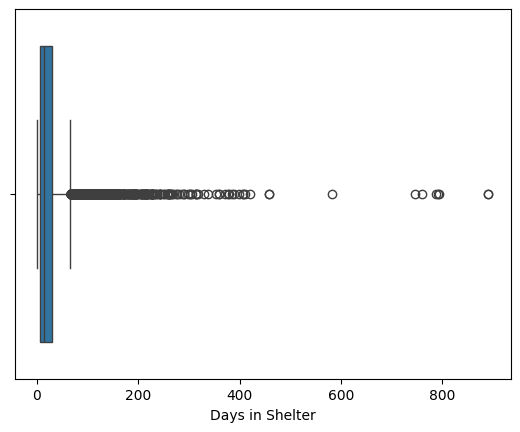

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Days in Shelter"] = df["Days in Shelter"].astype(float)
sns.boxplot(x=df["Days in Shelter"])
plt.show()


In [39]:
df[df["Days in Shelter"] > 50].count()

Type                1723
Breed               1723
Color               1723
Sex                 1723
Size                1723
Date Of Birth       1617
Kennel Number       1723
Days in Shelter     1723
Intake Type         1723
Intake Subtype      1723
Intake Condition    1723
dtype: int64

In [40]:
df.drop(df[df["Days in Shelter"] > 50].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,07/06/2018,LOBBY,4.0,STRAY,OVER THE COUNTER,HEALTHY
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,01/12/2022,CA02,45.0,STRAY,OVER THE COUNTER,HEALTHY
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,04/10/2022,CA02,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,06/28/2006,DS72,1.0,STRAY,FIELD,HEALTHY
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,10/31/2014,DS71,1.0,STRAY,FIELD,HEALTHY
...,...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,05/12/2014,CS06,5.0,STRAY,COMM CAT,HEALTHY
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,02/21/2022,CS04,2.0,STRAY,BORN_HERE,TREATABLE
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,10/15/2017,CA02,20.0,STRAY,OVER THE COUNTER,HEALTHY
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,12/22/2012,DS70,21.0,STRAY,OVER THE COUNTER,UNTREATABLE


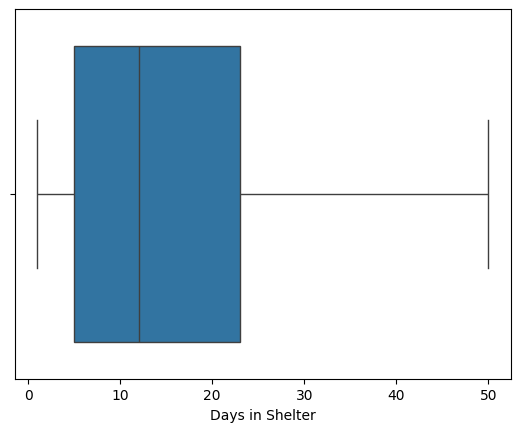

In [41]:
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [42]:
df.isnull().sum()

Type                   0
Breed                  0
Color                  0
Sex                    0
Size                   0
Date Of Birth       2458
Kennel Number          0
Days in Shelter        0
Intake Type            0
Intake Subtype         0
Intake Condition       0
dtype: int64

In [43]:
from datetime import datetime

df.dropna(subset=['Date Of Birth'], inplace=True)
current_year = datetime.now().year
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df['Age'] = (current_year - df['Date Of Birth'].dt.year.astype(int))
df.drop(['Date Of Birth'], axis=1, inplace=True)
df

,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,LOBBY,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,CA02,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,CA02,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,DS72,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,DS71,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,CS06,5.0,STRAY,COMM CAT,HEALTHY,9
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,CS04,2.0,STRAY,BORN_HERE,TREATABLE,1
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,CA02,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,DS70,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [44]:
df["Age"].unique()

array([ 5,  1, 17,  9,  7, 10,  2,  3,  8,  0, 13,  4, 14,  6, 11, 23, 12,
       16, 15, 19, 18, 21, 20, 25, 24, 22, 28, 26, 27, 34, 31])

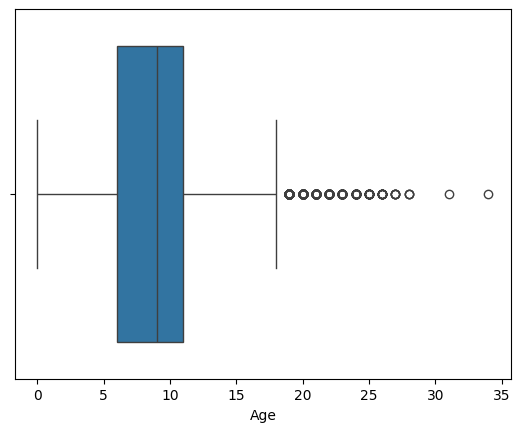

In [45]:
sns.boxplot(x=df["Age"])
plt.show()

In [46]:
df.drop(df[df["Age"] > 20].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,LOBBY,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,CA02,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,CA02,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,DS72,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,DS71,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...,...
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,CS06,5.0,STRAY,COMM CAT,HEALTHY,9
25429,DOG,AUST CATTLE DOG,BLACK/TAN,Unknown,SMALL,CS04,2.0,STRAY,BORN_HERE,TREATABLE,1
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,CA02,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,DS70,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [47]:
df.drop(df[df["Sex"] == "Unknown"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,LOBBY,4.0,STRAY,OVER THE COUNTER,HEALTHY,5
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,CA02,45.0,STRAY,OVER THE COUNTER,HEALTHY,1
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,CA02,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,DS72,1.0,STRAY,FIELD,HEALTHY,17
43,DOG,LABRADOR RETR/MIX,BLACK,Female,LARGE,DS71,1.0,STRAY,FIELD,HEALTHY,9
...,...,...,...,...,...,...,...,...,...,...,...
25426,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,DI104,16.0,STRAY,FIELD,HEALTHY,8
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,CS06,5.0,STRAY,COMM CAT,HEALTHY,9
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,CA02,20.0,STRAY,OVER THE COUNTER,HEALTHY,6
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,DS70,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11


In [48]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'ENGLISH SPOT/MIX',
       'HAVANA/MIX', 'POTBELLY PIG', 'RABBIT LH', 'JERSEY/MIX',
       'LOP-MINI/MIX', 'REX', 'REX/MIX', 'GOAT', 'CHICKEN',
       'CALIFORNIAN/MIX', 'RAT', 'LOP-MINI', 'LOP-FRENCH', 'SILVER',
       'GOAT/LA MANCHA', 'AMERICAN/REX', 'RHINELANDER/MIX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'HARLEQUIN/MIX', 'DUTCH/MIX', 'BOER',
       'HOTOT/MIX', 'NETHERLND DWARF/MIX', 'COCKATIEL', 'HIMALAYAN/MIX',
       'DUTCH', 'PALOMINO', 'HORSE', 'LOP-ENGLISH/MIX',
       'ANGORA-SATIN/MIX', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'LOP-HOLLAND/MIX', 'CALIFORNIAN', 'REX-MINI/MIX', 'LOP-ENGLISH',
       'GOAT/ALPINE', 'PALOMINO/MIX', 'CANARY', 'DOVE', 'BARRED ROCK',
       'LOP-AMER FUZZY/MIX', 'RABBIT LH/MIX', 'ENGLISH SPOT', 'MOUSE',
       'GOAT/NUBIAN'], dtype=object)

In [49]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "PALOMINO/MIX"), "Breed"] = "PALOMINO"

In [50]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'ENGLISH SPOT/MIX',
       'HAVANA/MIX', 'POTBELLY PIG', 'RABBIT LH', 'JERSEY/MIX',
       'LOP-MINI/MIX', 'REX', 'REX/MIX', 'GOAT', 'CHICKEN',
       'CALIFORNIAN/MIX', 'RAT', 'LOP-MINI', 'LOP-FRENCH', 'SILVER',
       'GOAT/LA MANCHA', 'AMERICAN/REX', 'RHINELANDER/MIX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'HARLEQUIN/MIX', 'DUTCH/MIX', 'BOER',
       'HOTOT/MIX', 'NETHERLND DWARF/MIX', 'COCKATIEL', 'HIMALAYAN/MIX',
       'DUTCH', 'PALOMINO', 'HORSE', 'LOP-ENGLISH/MIX',
       'ANGORA-SATIN/MIX', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'LOP-HOLLAND/MIX', 'CALIFORNIAN', 'REX-MINI/MIX', 'LOP-ENGLISH',
       'GOAT/ALPINE', 'CANARY', 'DOVE', 'BARRED ROCK',
       'LOP-AMER FUZZY/MIX', 'RABBIT LH/MIX', 'ENGLISH SPOT', 'MOUSE',
       'GOAT/NUBIAN'], dtype=object)

In [51]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("MIX")), "Breed"] = "MIX"

In [52]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'GOAT/LA MANCHA', 'AMERICAN/REX', 'HOTOT',
       'SHEEP', 'ANGORA-ENGLISH', 'BOER', 'COCKATIEL', 'DUTCH',
       'PALOMINO', 'HORSE', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN',
       'CALIFORNIAN', 'LOP-ENGLISH', 'GOAT/ALPINE', 'CANARY', 'DOVE',
       'BARRED ROCK', 'ENGLISH SPOT', 'MOUSE', 'GOAT/NUBIAN'],
      dtype=object)

In [53]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("GOAT")), "Breed"] = "GOAT"

In [54]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'AMERICAN/REX', 'HOTOT', 'SHEEP',
       'ANGORA-ENGLISH', 'BOER', 'COCKATIEL', 'DUTCH', 'PALOMINO',
       'HORSE', 'LOP-HOLLAND', 'RACCOON', 'AMERICAN', 'CALIFORNIAN',
       'LOP-ENGLISH', 'CANARY', 'DOVE', 'BARRED ROCK', 'ENGLISH SPOT',
       'MOUSE'], dtype=object)

In [55]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "AMERICAN/REX"), "Breed"] = "MIX"

In [56]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'GUINEA PIG', 'LOP-AMER FUZZY', 'HAMSTER', 'RABBIT SH',
       'DWARF HOTOT', 'PARAKEET', 'SHETLAND', 'MIX', 'POTBELLY PIG',
       'RABBIT LH', 'REX', 'GOAT', 'CHICKEN', 'RAT', 'LOP-MINI',
       'LOP-FRENCH', 'SILVER', 'HOTOT', 'SHEEP', 'ANGORA-ENGLISH', 'BOER',
       'COCKATIEL', 'DUTCH', 'PALOMINO', 'HORSE', 'LOP-HOLLAND',
       'RACCOON', 'AMERICAN', 'CALIFORNIAN', 'LOP-ENGLISH', 'CANARY',
       'DOVE', 'BARRED ROCK', 'ENGLISH SPOT', 'MOUSE'], dtype=object)

In [57]:
df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(["RABBIT SH", "RABBIT LH"])), "Breed"] = "RABBIT"

In [58]:
rabbit_breeds = ["LOP-AMER FUZZY",
                    "LOP-HOLLAND",
                    "RABBIT",
                    "DWARF HOTOT",
                    "MIX",
                    "REX",
                    "LOP-MINI",
                    "LOP-FRENCH",
                    "SILVER",
                    "HOTOT",
                    "ANGORA-ENGLISH",
                    "DUTCH",
                    "AMERICAN",
                    "CALIFORNIAN",
                    "LOP-ENGLISH",
                    "ENGLISH SPOT"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(rabbit_breeds)), "Breed"] = "RABBIT"

roden_breeds = ["GUINEA PIG",
                "HAMSTER",
                "RAT",
                "MOUSE"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(roden_breeds)), "Breed"] = "RODENT"

live_stock_breeds = ["GOAT",
                    "CHICKEN",
                    "SHEEP",
                    "BOER",
                    "BARRED ROCK"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(live_stock_breeds)), "Breed"] = "LIVESTOCK"

bird_breeds = ["PARAKEET",
                "COCKATIEL",
                "CANARY",
                "DOVE"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(bird_breeds)), "Breed"] = "BIRD"

horse_breeds = ["HORSE",
                "SHETLAND",
                "PALOMINO"]

df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(horse_breeds)), "Breed"] = "HORSE"

if "RACCOON" in df["Breed"].values:
    df.loc[df["Breed"] == "RACCOON", "Type"] = "RACCOON"

In [59]:
dog_types = df[df["Type"] == "DOG"]
sorted(dog_types["Breed"].unique())

['AFFENPINSCHER',
 'AIREDALE TERR',
 'AIREDALE TERR/MIX',
 'AKBASH',
 'AKBASH/MIX',
 'AKITA',
 'AKITA/ALASKAN HUSKY',
 'AKITA/GERM SHEPHERD',
 'AKITA/LABRADOR RETR',
 'AKITA/MIX',
 'ALASK KLEE KAI',
 'ALASK MALAMUTE',
 'ALASKAN HUSKY',
 'ALASKAN HUSKY/AUST SHEPHERD',
 'ALASKAN HUSKY/BEAGLE',
 'ALASKAN HUSKY/BORDER COLLIE',
 'ALASKAN HUSKY/GERM SHEPHERD',
 'ALASKAN HUSKY/LABRADOR RETR',
 'ALASKAN HUSKY/MIX',
 'ALASKAN HUSKY/PIT BULL',
 'ALASKAN HUSKY/SHIBA INU',
 'AM PIT BULL TER',
 'AM PIT BULL TER/MIX',
 'AMER BULLDOG',
 'AMER BULLDOG/BOXER',
 'AMER BULLDOG/MIX',
 'AMER BULLDOG/PIT BULL',
 'AMER ESKIMO',
 'AMER ESKIMO/MIX',
 'AMER FOXHOUND',
 'AMER FOXHOUND/GREAT PYRENEES',
 'AMER FOXHOUND/WHIPPET',
 'AMERICAN STAFF',
 'AMERICAN STAFF/CHIHUAHUA SH',
 'AMERICAN STAFF/GERM SHEPHERD',
 'AMERICAN STAFF/MIX',
 'AMERICAN STAFF/PIT BULL',
 'ANATOL SHEPHERD',
 'ANATOL SHEPHERD/MIX',
 'AUST CATTLE DOG',
 'AUST CATTLE DOG/BELG MALINOIS',
 'AUST CATTLE DOG/BORDER COLLIE',
 'AUST CATTLE DOG/CATAH

In [60]:
len(dog_types["Breed"].unique())

596

In [61]:
df.loc[(df["Type"] == "DOG") & (df["Breed"].str.contains("/")), "Breed"] = "MIX"

In [62]:
dog_types = df[df["Type"] == "DOG"]
len(dog_types["Breed"].unique())

122

In [63]:
df.isnull().sum()

Type                0
Breed               0
Color               0
Sex                 0
Size                0
Kennel Number       0
Days in Shelter     0
Intake Type         0
Intake Subtype      0
Intake Condition    0
Age                 0
dtype: int64

In [64]:
df.drop(df[df["Type"] == "OTHER"].index, inplace=True)

In [65]:
breed_counts = df["Breed"].value_counts() 
breed_counts

Breed
MIX                3037
DOMESTIC SH        2993
PIT BULL            810
CHIHUAHUA SH        621
GERM SHEPHERD       388
                   ... 
ENG SETTER            1
WHIPPET               1
TURKISH ANGORA        1
ST BERNARD RGH        1
PITT BULL & LAB       1
Name: count, Length: 163, dtype: int64

In [66]:
df = df[~df["Breed"].isin(breed_counts[breed_counts < 20].index)]

In [67]:
df["Breed"].value_counts() 

Breed
MIX                3037
DOMESTIC SH        2993
PIT BULL            810
CHIHUAHUA SH        621
GERM SHEPHERD       388
DOMESTIC MH         357
DOMESTIC LH         293
LABRADOR RETR       196
SIBERIAN HUSKY      153
SIAMESE              94
SIAMESE/MIX          79
PARSON RUSS TER      67
POODLE MIN           63
ROTTWEILER           47
BORDER COLLIE        44
SHIH TZU             43
AUST CATTLE DOG      41
CHIHUAHUA LH         40
MIN PINSCHER         35
BELG MALINOIS        33
YORKSHIRE TERR       32
AUST SHEPHERD        30
ALASKAN HUSKY        28
DOBERMAN PINSCH      26
POMERANIAN           25
MALTESE              25
BOXER                25
DACHSHUND            24
AMER BULLDOG         20
Name: count, dtype: int64

In [68]:
df["Days in Shelter"]

9         4.0
24       45.0
25       33.0
40        1.0
43        1.0
         ... 
25426    16.0
25427     5.0
25430    20.0
25432    21.0
25433    49.0
Name: Days in Shelter, Length: 9669, dtype: float64

In [69]:
df["Days in Shelter Class"] = pd.cut(df["Days in Shelter"], bins=[0, 5, 15, 25, 35, np.inf], labels=["very short", "short", "medium", "long", "very long"])

df

C:\Users\zust\AppData\Local\Temp\ipykernel_33996\764747827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Days in Shelter Class"] = pd.cut(df["Days in Shelter"], bins=[0, 5, 15, 25, 35, np.inf], labels=["very short", "short", "medium", "long", "very long"])


,Type,Breed,Color,Sex,Size,Kennel Number,Days in Shelter,Intake Type,Intake Subtype,Intake Condition,Age,Days in Shelter Class
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,LOBBY,4.0,STRAY,OVER THE COUNTER,HEALTHY,5,very short
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,CA02,45.0,STRAY,OVER THE COUNTER,HEALTHY,1,very long
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,CA02,33.0,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1,long
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,DS72,1.0,STRAY,FIELD,HEALTHY,17,very short
43,DOG,MIX,BLACK,Female,LARGE,DS71,1.0,STRAY,FIELD,HEALTHY,9,very short
...,...,...,...,...,...,...,...,...,...,...,...,...
25426,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,DI104,16.0,STRAY,FIELD,HEALTHY,8,medium
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,CS06,5.0,STRAY,COMM CAT,HEALTHY,9,very short
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,CA02,20.0,STRAY,OVER THE COUNTER,HEALTHY,6,medium
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,DS70,21.0,STRAY,OVER THE COUNTER,UNTREATABLE,11,medium


In [70]:
df["Days in Shelter Class"].value_counts()

Days in Shelter Class
short         2947
very short    2323
medium        1976
long          1321
very long     1102
Name: count, dtype: int64

In [71]:
df = df.drop('Days in Shelter', axis=1)
df

,Type,Breed,Color,Sex,Size,Kennel Number,Intake Type,Intake Subtype,Intake Condition,Age,Days in Shelter Class
9,CAT,DOMESTIC SH,BRN TABBY/WHITE,Male,SMALL,LOBBY,STRAY,OVER THE COUNTER,HEALTHY,5,very short
24,CAT,DOMESTIC SH,BLACK/WHITE,Male,SMALL,CA02,STRAY,OVER THE COUNTER,HEALTHY,1,very long
25,CAT,DOMESTIC SH,CALICO,Female,SMALL,CA02,OWNER SURRENDER,OVER THE COUNTER,HEALTHY,1,long
40,DOG,LABRADOR RETR,BROWN,Male,LARGE,DS72,STRAY,FIELD,HEALTHY,17,very short
43,DOG,MIX,BLACK,Female,LARGE,DS71,STRAY,FIELD,HEALTHY,9,very short
...,...,...,...,...,...,...,...,...,...,...,...
25426,DOG,PIT BULL,BLUE/WHITE,Female,MEDIUM,DI104,STRAY,FIELD,HEALTHY,8,medium
25427,CAT,DOMESTIC SH,BLACK/WHITE,Female,SMALL,CS06,STRAY,COMM CAT,HEALTHY,9,very short
25430,CAT,DOMESTIC SH,WHITE/GRAY,Male,SMALL,CA02,STRAY,OVER THE COUNTER,HEALTHY,6,medium
25432,DOG,PIT BULL,TAN/WHITE,Male,LARGE,DS70,STRAY,OVER THE COUNTER,UNTREATABLE,11,medium


In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)
df

,Type,Breed,Color,Sex,Size,Kennel Number,Intake Type,Intake Subtype,Intake Condition,Age,Days in Shelter Class
9,0,13,16,1,2,134,4,15,0,5,4
24,0,13,5,1,2,2,4,15,0,1,3
25,0,13,24,0,2,2,2,15,0,1,0
40,1,15,17,1,0,105,4,2,0,17,4
43,1,18,3,0,0,104,4,2,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...
25426,1,20,12,0,1,67,4,2,0,8,1
25427,0,13,5,0,2,10,4,1,0,9,4
25430,0,13,55,1,2,2,4,15,0,6,1
25432,1,20,48,1,0,103,4,15,2,11,1


In [73]:
df["Days in Shelter Class"].value_counts()

Days in Shelter Class
2    2947
4    2323
1    1976
0    1321
3    1102
Name: count, dtype: int64

In [74]:
decision = df["Days in Shelter Class"]
attributes = df.drop("Days in Shelter Class", axis=1)

In [75]:
attributes

,Type,Breed,Color,Sex,Size,Kennel Number,Intake Type,Intake Subtype,Intake Condition,Age
9,0,13,16,1,2,134,4,15,0,5
24,0,13,5,1,2,2,4,15,0,1
25,0,13,24,0,2,2,2,15,0,1
40,1,15,17,1,0,105,4,2,0,17
43,1,18,3,0,0,104,4,2,0,9
...,...,...,...,...,...,...,...,...,...,...
25426,1,20,12,0,1,67,4,2,0,8
25427,0,13,5,0,2,10,4,1,0,9
25430,0,13,55,1,2,2,4,15,0,6
25432,1,20,48,1,0,103,4,15,2,11


In [76]:
decision

9        4
24       3
25       0
40       4
43       4
        ..
25426    1
25427    4
25430    1
25432    1
25433    3
Name: Days in Shelter Class, Length: 9669, dtype: int32

In [77]:
attributes.shape

(9669, 10)

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

attributes, decision = smote.fit_resample(attributes, decision)

In [79]:
attributes.shape

(14735, 10)

In [80]:
decision.shape

(14735,)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)
scaled_attributes

array([[-1.19713164, -0.50830335, -0.41330659, ...,  0.72583652,
        -0.50113188, -0.92440926],
       [-1.19713164, -0.50830335, -1.01251944, ...,  0.72583652,
        -0.50113188, -1.9621139 ],
       [-1.19713164, -0.50830335,  0.02248458, ...,  0.72583652,
        -0.50113188, -1.9621139 ],
       ...,
       [ 0.83533002,  0.65403097,  0.40380185, ..., -1.13293027,
        -0.50113188,  0.63214769],
       [-1.19713164, -0.50830335,  0.89406691, ..., -1.27591233,
        -0.50113188, -0.14613079],
       [ 0.83533002,  0.65403097, -0.3043588 , ..., -1.13293027,
        -0.50113188, -0.6649831 ]])

In [82]:
scaled_decision = scaler.fit_transform(decision.values.reshape(-1, 1))
scaled_decision

array([[ 1.41421356],
       [ 0.70710678],
       [-1.41421356],
       ...,
       [ 1.41421356],
       [ 1.41421356],
       [ 1.41421356]])

In [83]:
#scaled att and scaled dec merged to df with headerss
test_df = pd.DataFrame(np.concatenate((scaled_attributes, scaled_decision), axis=1), columns=df.columns)
test_df

#to csv
test_df.to_csv("./test_data/scaled_dataframe.csv")

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(attributes, decision, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [85]:
scaled_X_train, scaled_X_temp, scaled_y_train, scaled_y_temp = train_test_split(scaled_attributes, decision, test_size=0.3, random_state=42)
scaled_X_val, scaled_X_test, scaled_y_val, scaled_y_test = train_test_split(scaled_X_temp, scaled_y_temp, test_size=0.5, random_state=42)

Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import optuna

c:\Users\zust\Desktop\PJATK\shelter\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion)
    model.fit(scaled_X_train, scaled_y_train)
    score = model.score(scaled_X_val, scaled_y_val)
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

In [87]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

accuracy_score(y_val, y_pred)

0.49276018099547514

In [88]:
scaled_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
scaled_rf.fit(scaled_X_train, scaled_y_train)

scaled_y_pred = scaled_rf.predict(scaled_X_val)

accuracy_score(scaled_y_val, scaled_y_pred)

0.49411764705882355

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 2, 10)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("algorithm", ["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int("leaf_size", 2, 10)
    p = trial.suggest_int("p", 1, 10)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)
    model.fit(scaled_X_train, scaled_y_train)
    score = model.score(scaled_X_val, scaled_y_val)
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_val)

multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
multinomial_pred = multinomial.predict(X_val)

bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
bernoulli_pred = bernoulli.predict(X_val)

complement = ComplementNB()
complement.fit(X_train, y_train)
complement_pred = complement.predict(X_val)

categorical = CategoricalNB()
categorical.fit(X_train, y_train)
categorical_pred = categorical.predict(X_val)

print("Gaussian accuracy:" + str(accuracy_score(y_val, gaussian_pred)))
print("Multinomial accuracy:" + str(accuracy_score(y_val, multinomial_pred)))
print("Bernoulli accuracy:" + str(accuracy_score(y_val, bernoulli_pred)))
print("Complement accuracy:" + str(accuracy_score(y_val, complement_pred)))
print("Categorical accuracy:" + str(accuracy_score(y_val, categorical_pred)))


Gaussian accuracy:0.32895927601809954
Multinomial accuracy:0.26334841628959277
Bernoulli accuracy:0.27782805429864255
Complement accuracy:0.267420814479638
Categorical accuracy:0.3773755656108597


In [ ]:
confusion_matrix(y_val, y_pred)

In [ ]:
classification_report(y_val, y_pred)

In [90]:
import optuna
from tensorflow import keras
from keras import optimizers
from optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.metrics import Accuracy

def objective(trial):
    units_layer1 = trial.suggest_int('units_layer1', 32, 512)
    units_layer2 = trial.suggest_int('units_layer2', 32, 512)
    dropout_rate1 = trial.suggest_float('dropout_rate1', 0.1, 0.7)
    dropout_rate2 = trial.suggest_float('dropout_rate2', 0.1, 0.7)
    activation = "relu"
    activation2 = "relu"
    kernel_initializer = trial.suggest_categorical('kernel_initializer', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer2 = trial.suggest_categorical('kernel_initializer2', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_regularizer_value = trial.suggest_float('kernel_regularizer_value', 0.01, 0.1)
    kernel_regularizer_value2 = trial.suggest_float('kernel_regularizer_value2', 0.01, 0.1)

    model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, input_shape=(X_train.shape[1],)),

        Dense(units_layer2, activation=activation2),

        Dense(1)
    ])

    model.compile(optimizer=Nadam(), metrics=[Accuracy()], loss='binary_crossentropy')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    return model.evaluate(X_val, y_val, verbose=0)[1]


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


ModuleNotFoundError: No module named 'optimizers'

In [91]:
import os

folder_path = "./test_data"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Usunięto plik: {filename}")
    except Exception as e:
        print(f"Błąd podczas usuwania pliku {filename}: {e}")

Usunięto plik: scaled_dataframe.csv
Usunięto plik: test.csv
